<a href="https://colab.research.google.com/github/chengjin-hub/2D-image-of-rock-sample-in-CT-/blob/main/speed_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# 第一步：上传 Excel 文件
# ==========================================
print("请点击下方按钮上传你的 Excel 文件 (.xlsx 或 .xls)：")
uploaded = files.upload()

# 获取上传的文件名
filename = next(iter(uploaded))
print(f"正在读取文件: {filename} ...")

# 读取 Excel 数据
# 如果你的数据在特定的 Sheet，可以加 sheet_name='Sheet1' 参数
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# 打印前5行数据，方便你核对列名是否正确
print("\n数据预览 (前5行):")
print(df.head())
print("-" * 30)

# ==========================================
# 第二步：设置列名 (★关键：请根据你的 Excel 修改这里★)
# ==========================================
# 假设你的 Excel 表头是 'X', 'Y', 'Z', 'Speed'
# 如果你的表头是中文，比如 '坐标X', '速度'，请对应修改引号里的内容
try:
    x_col = 'X'      # 修改为你的 X 轴列名
    y_col = 'Y'      # 修改为你的 Y 轴列名
    z_col = 'Z'      # 修改为你的 Z 轴列名
    v_col = 'Speed'  # 修改为你的 速度/数值 列名

    # 提取数据
    x = df[x_col]
    y = df[y_col]
    z = df[z_col]
    speed = df[v_col]

except KeyError as e:
    print(f"\n❌ 错误：在你的 Excel 中找不到列名 {e}。")
    print("请检查上方打印的 '数据预览'，并将代码中的 x_col, y_col 等变量修改为你 Excel 中真实的列名。")
    # 停止运行后续代码
    raise

# ==========================================
# 第三步：绘图
# ==========================================
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 核心绘图命令
# c=speed : 颜色由速度决定
# cmap='jet' : 颜色风格 (蓝->青->黄->红)
# s=80 : 点的大小
scatter = ax.scatter(x, y, z, c=speed, cmap='jet', s=80, alpha=0.9, edgecolors='grey')

# 添加侧边颜色条 (Colorbar)
cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label(f'{v_col} Value', rotation=270, labelpad=20, fontsize=12)

# 设置坐标轴标签
ax.set_xlabel(f'{x_col}', fontsize=12)
ax.set_ylabel(f'{y_col}', fontsize=12)
ax.set_zlabel(f'{z_col}', fontsize=12)

# 设置标题
ax.set_title(f'3D Scatter Plot: Color Mapped to {v_col}', fontsize=16)

# 调整初始视角 (高度 30度，方位 135度)
ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()

请点击下方按钮上传你的 Excel 文件 (.xlsx 或 .xls)：


Saving sensor_speeds_calculated - point.csv to sensor_speeds_calculated - point.csv
正在读取文件: sensor_speeds_calculated - point.csv ...


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import os
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# 第一步：上传文件
# ==========================================
print("请点击下方按钮上传你的文件 (.csv, .xlsx 或 .xls)：")
uploaded = files.upload()

# 获取上传的文件名
filename = next(iter(uploaded))
print(f"正在读取文件: {filename} ...")

# ==========================================
# ★修正点：自动判断是 CSV 还是 Excel 并读取★
# ==========================================
try:
    if filename.lower().endswith('.csv'):
        # 如果是 csv 文件，使用 read_csv
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    else:
        # 否则尝试作为 excel 读取
        df = pd.read_excel(io.BytesIO(uploaded[filename]))

    print("\n数据读取成功！预览 (前5行):")
    print(df.head())
    print("-" * 30)

except Exception as e:
    print(f"\n❌ 读取文件失败: {e}")
    print("可能原因：文件格式损坏，或者并不是标准的 CSV/Excel 文件。")
    raise

# ==========================================
# 第二步：设置列名 (★关键：请检查下方打印的预览★)
# ==========================================
# 根据你的文件名，我猜测你的列名可能是下面这些
# 如果报错 KeyError，请根据上方打印的 '数据预览' 修改引号里的名称
try:
    # 常见可能列名，如果不对应，请手动修改这里！
    # 比如你的CSV里第一行是: x_pos, y_pos, z_pos, velocity
    # 那就改成 x_col = 'x_pos' 等等

    # 尝试自动寻找包含 x, y, z, speed 意思的列（选做优化，防报错）
    columns = df.columns.str.lower()

    # 这里默认还是让你手动指定，或者保留之前的假设：
    x_col = 'X'      # 修改为你的 X 轴列名
    y_col = 'Y'      # 修改为你的 Y 轴列名
    z_col = 'Z'      # 修改为你的 Z 轴列名
    v_col = 'Speed'  # 修改为你的 速度/数值 列名

    # 如果你的CSV列名比较特殊，请取消下面几行的注释并修改：
    # x_col = 'POINT_X'
    # y_col = 'POINT_Y'
    # z_col = 'POINT_Z'
    # v_col = 'VELOCITY'

    x = df[x_col]
    y = df[y_col]
    z = df[z_col]
    speed = df[v_col]

except KeyError as e:
    print(f"\n❌ 错误：在你的数据中找不到列名 {e}。")
    print("👉 请看上面打印出来的表格第一行（表头），把代码中 x_col = '...' 里的名字改成和你表格里一模一样的名字。")
    raise

# ==========================================
# 第三步：绘图
# ==========================================
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘图
img = ax.scatter(x, y, z, c=speed, cmap='jet', s=80, alpha=0.9, edgecolors='grey')

# 颜色条
cbar = plt.colorbar(img, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label(f'{v_col} Value', rotation=270, labelpad=20, fontsize=12)

# 标签
ax.set_xlabel(f'{x_col}')
ax.set_ylabel(f'{y_col}')
ax.set_zlabel(f'{z_col}')
ax.set_title(f'3D Scatter Plot: {filename}')

# 视角
ax.view_init(elev=30, azim=135)

plt.show()

请点击下方按钮上传你的文件 (.csv, .xlsx 或 .xls)：


Saving sensor_speeds_calculated - point.csv to sensor_speeds_calculated - point (1).csv
正在读取文件: sensor_speeds_calculated - point (1).csv ...

数据读取成功！预览 (前5行):
   Sensor_ID  X_cm  Y_cm  Z_cm  Speed_cm_s
0          1     0     0     0        0.27
1          2    25     0     0        0.26
2          3    50     0     0        0.29
3          4    75     0     0        0.49
4          5   100     0     0        0.60
------------------------------

❌ 错误：在你的数据中找不到列名 'X'。
👉 请看上面打印出来的表格第一行（表头），把代码中 x_col = '...' 里的名字改成和你表格里一模一样的名字。


KeyError: 'X'

请点击下方按钮上传你的文件 (.csv, .xlsx 或 .xls)：


Saving sensor_speeds_calculated - point.csv to sensor_speeds_calculated - point (2).csv
正在读取文件: sensor_speeds_calculated - point (2).csv ...

数据读取成功！
   Sensor_ID  X_cm  Y_cm  Z_cm  Speed_cm_s
0          1     0     0     0        0.27
1          2    25     0     0        0.26
2          3    50     0     0        0.29
3          4    75     0     0        0.49
4          5   100     0     0        0.60


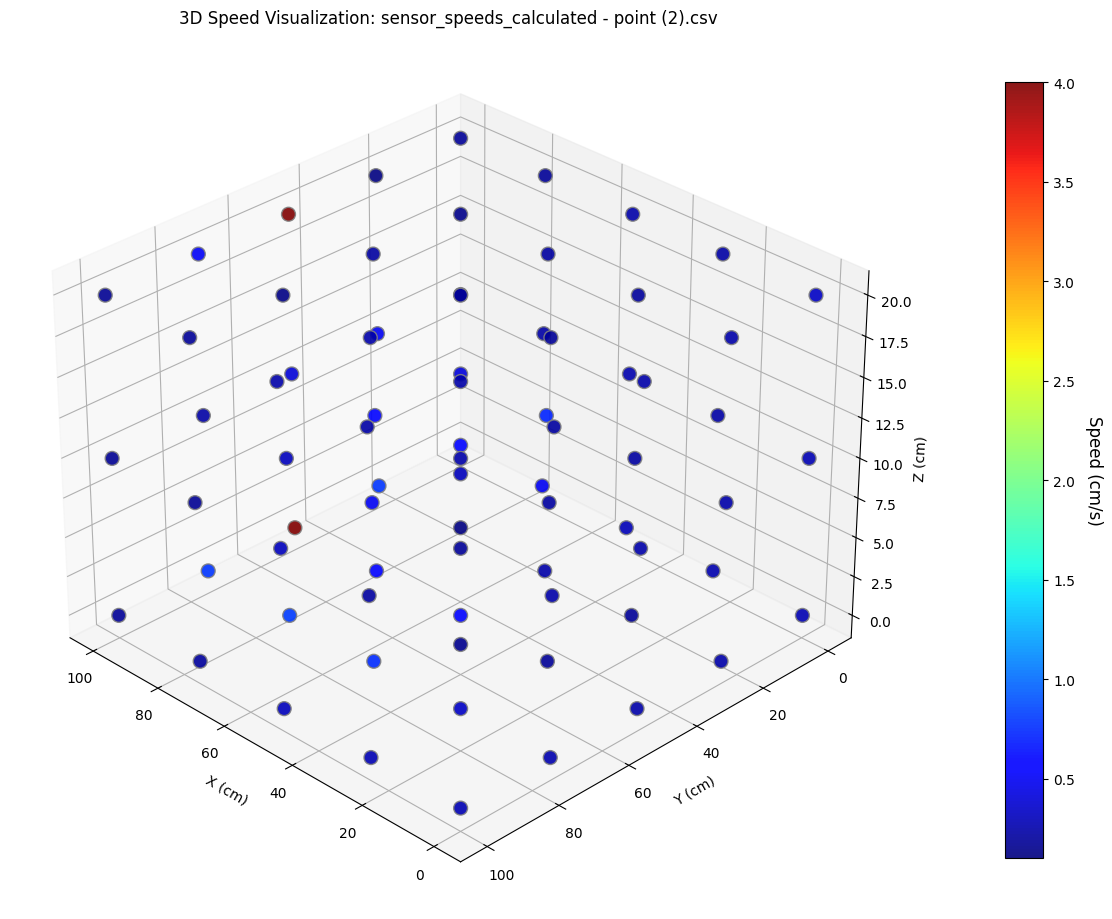

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# 第一步：上传文件
# ==========================================
print("请点击下方按钮上传你的文件 (.csv, .xlsx 或 .xls)：")
uploaded = files.upload()

# 获取上传的文件名
filename = next(iter(uploaded))
print(f"正在读取文件: {filename} ...")

# 自动判断是 CSV 还是 Excel 并读取
try:
    if filename.lower().endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    else:
        df = pd.read_excel(io.BytesIO(uploaded[filename]))

    print("\n数据读取成功！")
    print(df.head()) # 再次打印预览以防万一

except Exception as e:
    print(f"\n❌ 读取文件失败: {e}")
    raise

# ==========================================
# 第二步：设置列名 (★已根据你的截图修改正确★)
# ==========================================
try:
    # 这里我已经填好了你截图中的确切列名
    x_col = 'X_cm'          # 对应 X轴
    y_col = 'Y_cm'          # 对应 Y轴
    z_col = 'Z_cm'          # 对应 Z轴
    v_col = 'Speed_cm_s'    # 对应 速度(颜色)

    # 提取数据
    x = df[x_col]
    y = df[y_col]
    z = df[z_col]
    speed = df[v_col]

except KeyError as e:
    print(f"\n❌ 依然报错：找不到列名 {e}。")
    print("请再次检查上方打印的 '数据预览'，看看表头是否包含空格或其他字符。")
    raise

# ==========================================
# 第三步：绘图
# ==========================================
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘图：c=speed 表示颜色映射
img = ax.scatter(x, y, z, c=speed, cmap='jet', s=100, alpha=0.9, edgecolors='grey')

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Speed (cm/s)', rotation=270, labelpad=20, fontsize=12)

# 设置坐标轴标签
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.set_title(f'3D Speed Visualization: {filename}')

# 调整视角
ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()